# Simulatorische Untersuchung der gerichteten Perkolation

    01/2016 - 03/2016

    Universität Potsdam

    Christian Michaelis, Erik Mau

## I. Theoretische Einführung

Wir wollen gerichtete Kanten-Perkolation auf einem zwei-dimensionalen, rechteckigem Gitter untersuchen 
(Abb. 1). Die gerichteten Kanten zwischen den indizierten Gitterpunkten 
$A_{ti}\to A_{t+1i}$ sowie $A_{ti}\to A_{t+1 i+1}$ werden unabhaengig voneinander mit einer 
Wahrscheinlichkeit $0\le p\le 1$ gesetzt, und man sagt, das Gitter perkoliert, wenn eine 
gerichtete Verbindung zwischen zwei Gitterpunkten $A_{0i}$ und $A_{T_\textrm{max}j}$ ueber 
gesetzte Kanten existiert. Nimmt das Feld `A[t,i]` die Werte `1` und `0` an, jenachdem, 
ob ein gerichteter Pfad zwischen einem Gitterpunkt `A[0,:]` und `A[t,i]` existiert, 
so ergeben sich die entsprechenden Eintraege der Zeile `A[t+1,:]` allein aus der vorherigen 
Zeile `A[t,:]` und der Uebergangswahrscheinlichkeit $p$. Gerichtete Perkolation 
kann daher als iterativer Prozess `A[now,:]` $\to$ `A[nxt,:]` beliebig lange auf einem Feld 
mit zwei Zeilen simuliert werden, wenn die Indexvariablen `now` und `nxt` in jedem Schritt 
einfach vertauscht werden. Als Anfangbedingung gelte `A[0,:]=1`. Felder mit dem Wert `1` koennen auch als "aktiv" bezeichnet werden. In diesem Fall beschreibt gerichtete Perkolation einen Prozess, in dem ein aktiver Gitterpunkt in einem Zeitschritt einen Nachbarn aktivieren kann und, unabhaengig davon, selbst inaktiv werden kann.

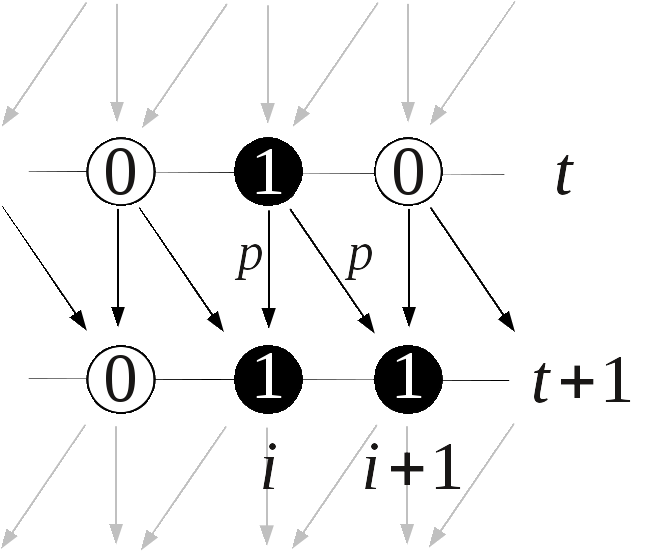

In [3]:
from IPython.display import Image
Image(filename="./DPFig.png", width=300)

Abbildung 1 : Ist ein Gitterpunkt zum Zeitpunkt $t$ aktiv, so bleibt er mit der Wahrscheinlichkeit $p$ in einem Zeitschritt aktiv und aktiviert, davon unabhaengig, seinen rechten Nachbarn ebenso mit einer Wahrscheinlichkeit $p$. Wechselt man in jedem Zeitschritt zwischen rechtem und linkem Nachbarn, vermeidet man eine mittlere Drift nach rechts.

Ein Perkolationsexperiment besteht aus der Simulation eines solchen Perkolationsprozesses bei gegebener Zeilenlaenge $N$ des Feldes `A[:,0:N-1]`, maximaler Simulationszeit $T_\textrm{max}$, sowie der Wahrscheinlichkeit $p$, dass ein Wert `A[now,i]==1` nach `A[nxt,i]` bzw. `A[nxt,mod(i+1,N)]` propagiert wird (hier mit periodischen Randbedingungen). Das Resultat des Experimentes sind Zahlen $(r_0,r_1,\dots r_k,r_\textrm{final},T_\omega)$, wobei $r_l$ der Anteil `sum(A[now,:])/float(N)` der "aktiven" Zellen zu den Zeitpunkten $t_l = 2^l < T_\textrm{max}$ und $t_\textrm{final}=T_\textrm{max}$ ist, und $T_\omega$ der erste Zeitpunkt, an dem keine Zellen mehr aktiv sind. Falls $T_\omega>T_\textrm{max}$ ist, soll der Wert $T_\omega=T_\textrm{max}+1$ angenommen werden. Ansonsten kann das Experiment nach $T_\omega$ abgebrochen werden, da fuer alle $t_l\ge T_\omega$ folgt $r_l=0$.

Die kritische Uebergangswahrscheinlichkeit $p_{cr}$ ergibt sich im Grenzfall sehr grosser Systeme $N\to\infty$ daraus, dass die Aktivitaet fuer $p<p_{cr}$ asymptotisch exponentiell gegen Null geht und fuer $p>p_{cr}$ bei einem von Null verschiedenen Wert saturiert. Am kritischen Punkt gilt $r(t)\sim t^{-\delta}$, allerdings nur solange $r\gg O(1/N)$.

## II. Aufgabenstellungen

**Achtung :** Versuchen Sie mit Feldern von ganzen Zahlen (`dtype=int`) zu arbeiten, 
und vermeiden Sie explizite Schleifen ueber Feldindizes, um einen moeglichst schnellen 
Python Code zu erhalten. Verwenden Sie vektorisierte Operationen, Indexnotationen und verschiedene 
Views ueber Felder.



- Schreiben Sie eine Funktion `r,Tohm,Pic = DPerc(N,p,Tmax,Tshow=0)`, welche ein Perkolationsexperiment durchfuehrt, und die Aktivitaeten $r_{l=0\dots k}$ und $r_\textrm{final}$ in einem Feld `r[0:k+2]` sowie $T_\omega$ als ganze Zahl `Tohm` zurueckliefert. Falls die ganze Zahl `Tshow` ungleich Null ist, so soll die Matrix `Pic[0:Tshow-1,0:N-1]` die ersten `Tshow` Zeilen des Experiments enthalten. Ansonsten wird `Pic=None` zurueckgeliefert.
- Experimentieren Sie mit verschiedenen Werten von $p$ und $N$, und erzeugen Sie Bilder von `Pic`, welche das das Systemverhalten gut repraesentieren. **Hinweis :** Sie koennen das Programm so modifizieren, dass die Drift in Richtung groesserer Spalten eliminiert wird und die Bilder symmetrischer aussehen.
- Beschreiben Sie Ihre Beobachtungen mit Bezug auf die Bilder.

- Fuehren Sie Perkolationsexperimente in grossen Systemen $N$ ueber lange Zeitraeume $T_\textrm{max}$ durch, und plotten Sie `r[0:k+1]` doppelt logarithmisch gegen die Zeiten $t_{l=0\dots k}=2^l$. Grenzen Sie die kritische Uebergangswahrscheinlichkeit so genau ein, wie es Ihnen in vertretbarer Zeit moeglich ist, und bestimmen Sie zusaetzlich den Exponenten $\delta$ durch lineare Regression im log-log plot.
- Bestimmen Sie fuer Uebergangswahrscheinlichkeiten $p>p_{cr}$ die Aktivitaet $r(p)$, bei der der Perkolationsprozess saturiert, plotten Sie diese als Funktion von $|p-p_{cr}|$ doppelt logarithmisch, und bestimmen Sie $\beta$ unter der Annahme $r(p)\sim |p-p_{cr}|^\beta$.
- Schreiben Sie eine Funktion `r, Tohm = PercStats(N,p,Tmax,anz)`, welche `anz` Perkolationsexperimente durchfuehrt, und im Feld `r[0:k+1]` den *Median* der Aktivitaeten zu den Zeitpunkten $t_{l=0\dots k}=2^l<T_\textrm{max}$ sowie $t_\textrm{final}=T_\textrm{max}$, und in `Tohm` den *Median* der Zeiten $T_\omega$ zurueckliefert. Der Median ist das `anz/2`-kleinste Ergebnis in einer Serie aus `anz` Experimenten.
- Schreiben Sie ein Programm, welches die Funktion `PercStats(N,p,Tmax,anz)` fuer jeden Wert $p_\textrm{min}\le p_n\le p_\textrm{max}$ einer feinen Diskretisierung eines Intervals von Wahrscheinlichkeiten aufruft, und die Ergebnisse zeilenweise in einer Datei ausgibt. Die erste Zeile der Datei soll als Kommentar die Form 
`# N=..., Tmax=..., anz=...`
haben, und jede weitere Zeile soll als ersten Eintrag den Wert $p_n$ zu stehen haben, fuer den die Statistik erstellt wurde. 

**Hinweis :** Benutzen Sie den Befehl `file.flush()`, um waehrend die Simulation laeuft das Schreiben in die Datei zu erzwingen.

- Lassen Sie das Programm ueber einem interessanten Intervall von Wahrscheinlichkeiten mit hinreichend grosser Anzahl `anz` von Experimenten an jedem Punkt laufen. Erzeugen Sie Dateien fuer $N=128, 256, 512$ und $1024$, sowie $T_\textrm{max}=16N$, und plotten Sie $r_\textrm{final}(p)$, sowie $T_\omega(p)$.

**Zusatzaufgabe :**

- Wiederholen Sie den Versuch mit der Aenderung, dass nicht nur der jeweils rechte Nachbar aktiviert werden kann, sondern unabhaengig davon auch der linke.

## III. Erläuterung der verwendeten Funktionen

In [1]:
import numpy as np
import matplotlib.pyplot as py
from IPython.display import Image
%matplotlib inline

In [2]:
def update(A,ids,p):
    l=len(A)
    ku=(np.random.rand(l)<p).astype(np.int)
    ks=(np.random.rand(l)<p).astype(np.int)
    return(A*ku)|(A[ids]*ks) 

'''Perkolationsexperiment-Komplex (1 of 3)

    - aus dem bisherigen Aktivitätsfeld A wird die neue Aktivtät berechnet
    - Propagation mit Wahrscheinlichkeit p ... 
            - ... nach unten
            - ... zur Seite (abhängig von der Indizierungsliste ids)
'''

'Perkolationsexperiment-Komplex (1 of 3)\n\n    - aus dem bisherigen Aktivitätsfeld A wird die neue Aktivtät berechnet\n    - Propagation mit Wahrscheinlichkeit p ... \n            - ... nach unten\n            - ... zur Seite (abhängig von der Indizierungsliste ids)\n'

In [3]:
def perex(N,p,pa,Tmax):
    A=(np.random.rand(N)<pa).astype(np.int)
    counter=0
    while (sum(A)>0) and (counter<Tmax):
        ids= (np.arange(N)+(-1)**counter) % N
        yield A
        A=update(A,ids,p)
        counter +=1
        
'''Perkolationsexperiment-Komplex (2 of 3)

'''

'Perkolationsexperiment-Komplex (2 of 3)\n\n'

In [4]:
def DPerc(N=100,p=0.5,pa=1,Tmax=10000,Tshow=0):
    epic = list(perex(N,p,pa,Tmax))
    l = len(epic)

    if l == Tmax:
        Tohm = Tmax +1
    else: Tohm = l
        
    if Tshow>0:
        Pic = epic[0:Tshow+1]
    else: Pic = None

    k=int(np.log(l)/np.log(2))
    r=[np.mean(epic[2**i]) for i in range(k)]
    r.extend([np.mean(epic[l-1])])   

    return  r,Tohm,Pic

'''Perkolationsexperiment-Komplex (3 of 3)

'''

'Perkolationsexperiment-Komplex (3 of 3)\n\n'

In [5]:
def polyfit(x,y,N=0):
    b=np.array(y)
    a=np.array(x)
    A=np.array([a**i for i in range(N+1)]).T
    
    c=np.linalg.solve(A.transpose().dot(A),A.transpose().dot(b))
    return c

'''Regressionsberechner
    - erstellt für gegebene Datensätze (x,y) das Polynom N-ten Grades, das diesen mit der geringsten (quadratischen) 
    Abweichung annähert
    - gibt in c die Koeffizienten dieses Polynoms zurück
'''

'Regressionsberechner\n    - erstellt für gegebene Datensätze (x,y) das Polynom N-ten Grades, das diesen mit der geringsten (quadratischen) \n    Abweichung annähert\n    - gibt in c die Koeffizienten dieses Polynoms zurück\n'

In [10]:
def evaluate(r,Tohm,plottype="lin",grade=0):
     
    x=np.linspace(0,len(r)-2,len(r)-1)
    x=np.append(2**x,np.array([Tohm-1]))
    
    if plottype == "log":
        x=np.log(x)/np.log(2)
        r=np.log(r)/np.log(2)   
    '''Logarithmierung der Wertepaare statt Anpassung der Achsen zwecks Übergabe an Regression'''
        
    if not grade==None:
        M=polyfit(x,r,grade)
        wb= sum(((x**i)*M[i]) for i in range(len(M)))
        fehler= np.mean(abs(r-wb))
    else: 
        M=None
        wb=None
        fehler=None
            
    D={"x":x,"y":r,"yregr":wb,"Tohm":Tohm,"fehler":fehler,"plot":plottype,"coeffs":M}
    return D



'''Auswerter

    - bekommt die Daten eines Perkolationsexperiments als Eingabe
    - wertet diese anhand des gewählten Regressionsgrads aus
    - liefert Dictionary mit Angaben über die Auswertung zurück (Mittlerer Fehler, Koeffizienten des Regressionspolynoms etc.)
'''

'Auswerter\n\n    - bekommt die Daten eines Perkolationsexperiments als Eingabe\n    - wertet diese anhand des gewählten Regressionsgrads aus\n    - liefert Dictionary mit Angaben über die Auswertung zurück (Mittlerer Fehler, Koeffizienten des Regressionspolynoms etc.)\n'

In [13]:
def nowplot(r,Tohm,Pic,title="",anz=1, plottype="lin",grade=None,regr_k=0):
    D=evaluate(r,Tohm,plottype=plottype,grade=grade)

    if plottype=="lin":
        py.ylim([0,1])
    elif plottype == "log":   
        py.ylim([-9,0.5])

   
    py.plot(D["x"],D["y"],label="Aktivität")
    if not grade==None:
        py.plot(D["x"],D["yregr"],label="Regression: h.Koeff: {})".format(round(D["coeffs"][len(D["coeffs"])-1],4)))
    py.legend(loc=0)
    py.ylabel("Aktivität")
    py.xlabel("Zeitschritt")
    py.title(title + " ({}.)".format(plottype))
    py.show()
    
    if not(Pic is None):
        py.imshow(Pic, interpolation= "nearest", aspect = "auto", cmap = "Blues")
        py.ylabel("Zeitschritt")
        py.xlabel("Zellposition")
        py.show()
    print("Inaktivität erreicht nach {} Zeitschritten".format(Tohm))
    
    if not D["fehler"]==None:
        print("Mittlere Abweichung: {}".format(round(D["fehler"],4)))

    return

'''Plotter

    - plottet ein Perkolationsexperiment
'''

'Plotter\n\n    - plottet ein Perkolationsexperiment\n'

In [8]:
def PercStats (N,p,Tmax,anz):
    T = [0 for i in range(anz)]
    a=[[] for i in range(anz)]
    
    for i in range(anz):
        a[i],T[i],Pic= DPerc(p=p,pa=1,Tmax=Tmax,N=N,Tshow=0) 
        
    
    l = max(len(a[i]) for i in range(anz))
    #print(l)
    
    data=np.zeros((anz,l))
    
    for i in range(anz):
        b=np.array(a[i])
        b.resize(l)
        data[i]=b
    
    r=np.zeros(l)
    
    for i in range(l):
        r[i]=np.median(data[:,i])
    
    Tohm=np.median(np.array(T))
    
    return r, Tohm

## IV. Untersuchungen bei Aktivierung nur einer Nachbarzelle

### Experimente zu verschiedenen Werten $N$ und $T_{max}$:

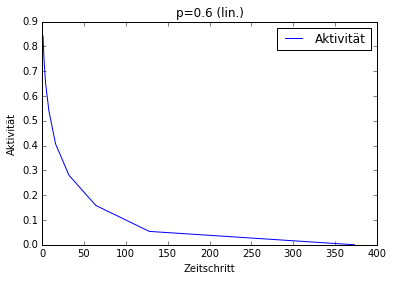

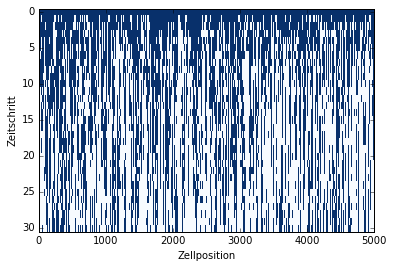

Inaktivität erreicht nach 374 Zeitschritten


In [132]:
p=0.6
nowplot(*DPerc(p=p,pa=1,Tmax=1000,N=5000,Tshow=30),title="p={}".format(p),grade=None,plottype="lin")

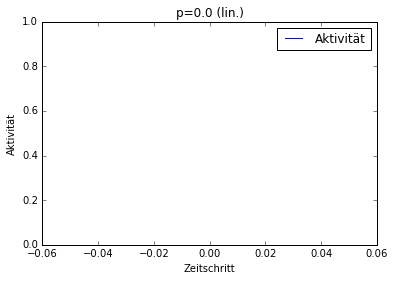

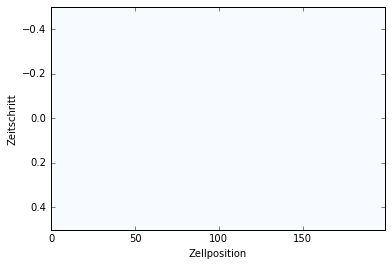

Inaktivität erreicht nach 1 Zeitschritten
---------------------------------------------------


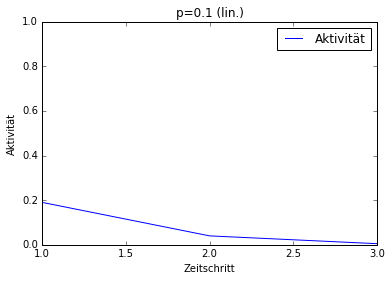

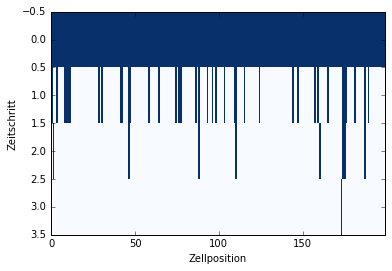

Inaktivität erreicht nach 4 Zeitschritten
---------------------------------------------------


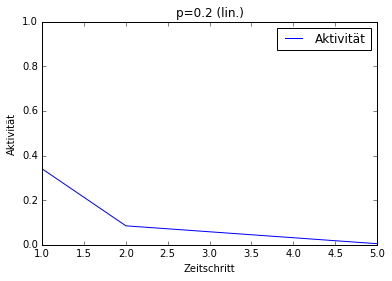

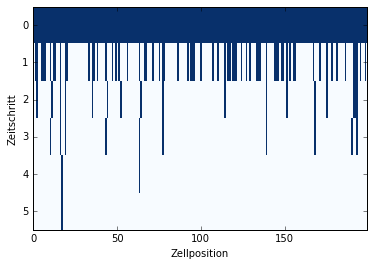

Inaktivität erreicht nach 6 Zeitschritten
---------------------------------------------------


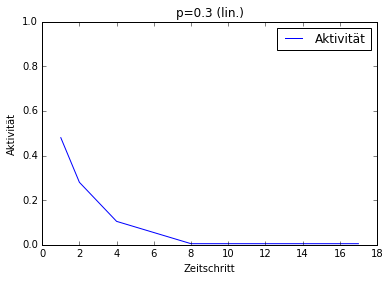

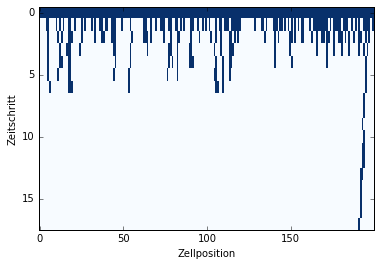

Inaktivität erreicht nach 18 Zeitschritten
---------------------------------------------------


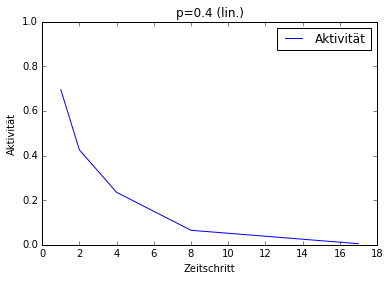

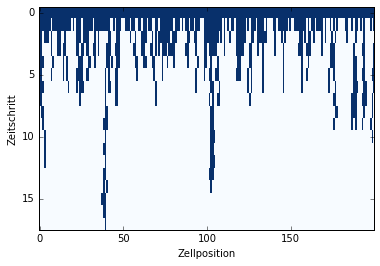

Inaktivität erreicht nach 18 Zeitschritten
---------------------------------------------------


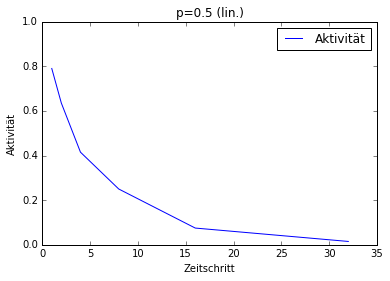

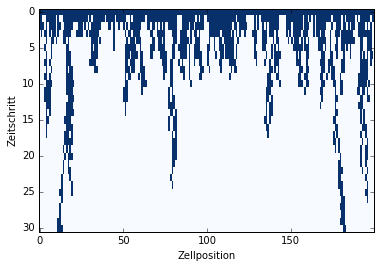

Inaktivität erreicht nach 33 Zeitschritten
---------------------------------------------------


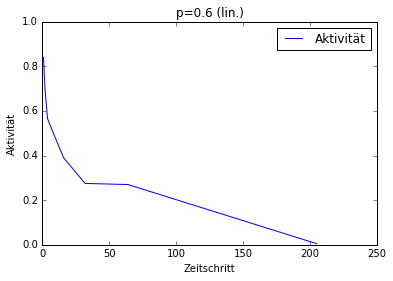

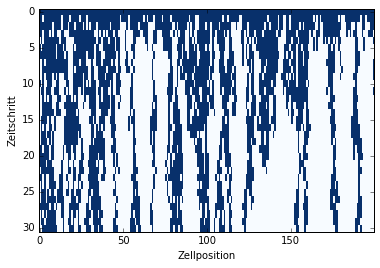

Inaktivität erreicht nach 206 Zeitschritten
---------------------------------------------------


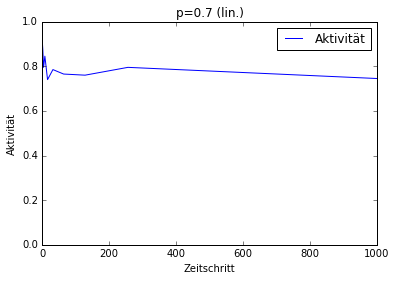

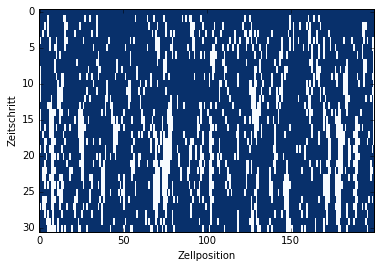

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


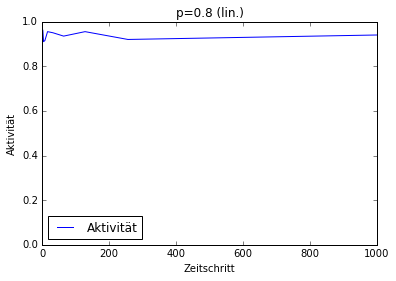

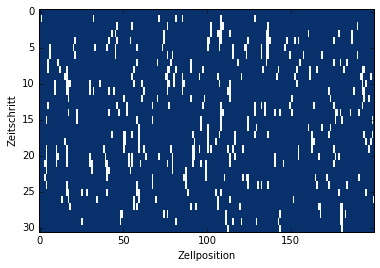

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


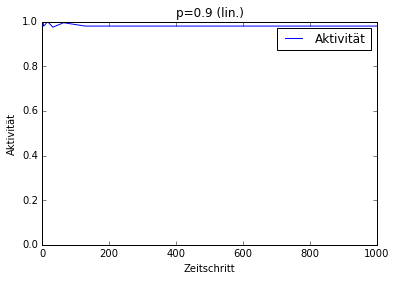

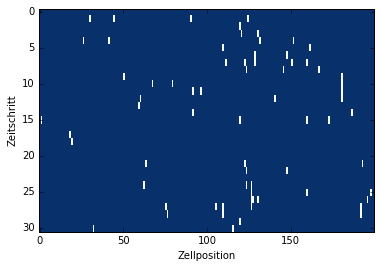

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


In [139]:
N=200
Tmax=1000
Tshow=30
anz=10

for i in range(anz):
    p=round(i/anz,3)
    nowplot(*DPerc(p=p,pa=1,Tmax=Tmax,N=N,Tshow=Tshow),title="p={}".format(p),plottype="lin")
    print("---------------------------------------------------")

### Grenzwahrscheinlichkeit $p_{cr}$

Die Aktivität bei der Grenzwahrscheinlichkeit $p_{cr}$ soll im doppelt-logarithmisch mit der Basis $a$ aufgetragenen Plot laut Annahme linear regressierbar sein. Eine entsprechend gefundene lineare Regressionsfunktion mit den Koeffizienten $m$ und $n$ nähert dann folgenden Zusammenhang an: 

$\log_{a}(r(t))=m\cdot\log_{a}{t}+n \qquad \Leftrightarrow \qquad r(t) = t^m \cdot  e^{n\ln{a}}$ 

Daraus lässt sich $r(t)\sim t^{-\delta}$ mit $\delta=-m$ ableiten.

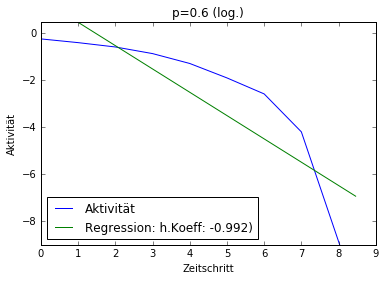

Inaktivität erreicht nach 353 Zeitschritten
Mittlere Abweichung: 1.4859


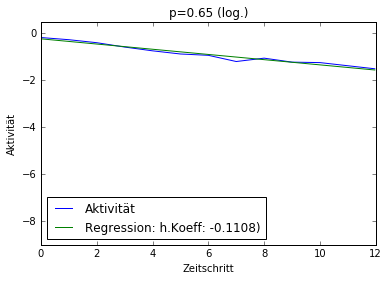

Inaktivität erreicht nach 4001 Zeitschritten
Mittlere Abweichung: 0.0671


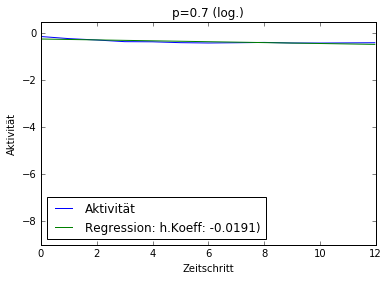

Inaktivität erreicht nach 4001 Zeitschritten
Mittlere Abweichung: 0.0402


In [15]:
Tmax=4000
N=2048
nowplot(*DPerc(p=0.600,pa=1,Tmax=Tmax,N=N,Tshow=0),title="p={}".format(0.600),plottype="log",grade=1)
nowplot(*DPerc(p=0.65,pa=1,Tmax=Tmax,N=N,Tshow=0),title="p={}".format(0.65),plottype="log",grade=1)
nowplot(*DPerc(p=0.700,pa=1,Tmax=Tmax,N=N,Tshow=0),title="p={}".format(0.700),plottype="log",grade=1)

Wie in den beiden obigen Darstellungen grob zu erkennen ist, liegt der gesuchte Grenzfall zwischen den gezeigten Beispielen: $0,6 \leq p_{cr} \leq 0,7$ 

Es kann beobachtet werden, dass bei wachsendem $N$ auch $T_{\omega}$ wächst. Um also bei der folgenden Untersuchung der Grenzwahrscheinlichkeit die stärker werdenden Schwankungen nahe einer entsprechend kleinen Aktivität ausblenden zu können, wird $T_{max}$ im Vergleich zu $N$ signifikant kleiner gewählt, als dies im obigen Experimentierverlauf der Fall war.

#### Eingrenzung der Grenzwahrscheinlichkeit:

Im Folgenden wird in einem festgelegten Intervall um die vermutete Grenzwahrschienichkeit $p_{cr}$ der Anstieg und die mittlerer Abweichung der jeweiligen Regressionsgeraden (Polynom 1. Grades) geplotet.

In [ ]:
anz=30
samples=50
start=0.644
end=0.646
Tmax=20000
N=10000

Ax=np.linspace(start,end,anz)
fehler=[0 for i in range(anz)]
m=[0 for i in range(anz)]


for i in range(anz):
    for j in range(samples):
        r,Tohm,Pic=DPerc(p=Ax[i],pa=1,Tmax=Tmax,N=N,Tshow=0)
        
        D=evaluate(r,Tohm,grade=1,plottype="log")
        
        fehler[i] += D["fehler"]
        m[i] += D["coeffs"][1]
    
    print(i/anz*100)
        
fehler=np.array(fehler)/samples
m=np.array(m)/samples

py.plot(Ax,fehler,label="Mittlerer Fehler")
py.plot(Ax,m,label="Mittlerer Anstieg")
py.title("N={}, Tmax={}, anz={}, samples={}".format(N,Tmax,anz,samples))
py.xlabel('p')
py.legend(loc=0)
py.savefig('.\data\cruc_prob\cruc_prob_{}_{}.png'.format(start,end), bbox_inches='tight')
py.show()

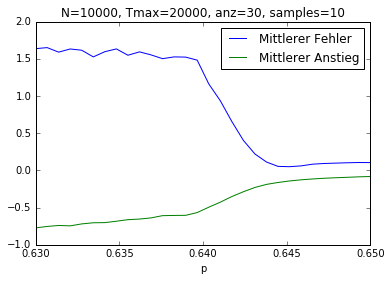

In [16]:
Image(filename="data\cruc_prob\cruc_prob_0.63_0.65.png")

$p_{cr}$ wird aufgrund der obigen Beobachtungen auf $0.645 \pm 0.001$ geschätzt

In [18]:
p_cr=0.645

### Übergangswahrscheinlichkeiten oberhalb von $p_{cr}$

In [174]:
r, T = PercStats(10000,0.3,20000,30)
print(r)
print(T)

[  5.08050000e-01   2.80400000e-01   9.17000000e-02   1.02000000e-02
   1.00000000e-04]
16.0


In [ ]:
def Perdat(N, pmin, pmax, sample, anz):
    f = open('data\interval\interval_{}_{}-{}.dat'.format(N, pmin, pmax),'w')
    f.write('# N={}, Tmax={}, anz={}\n'.format(N,16*N,anz))

    for p in np.linspace(pmin, pmax, sample):
        Tmax = 16*N
        f.write(str(p)+" ")
        r, Tohm = PercStats(N, p, Tmax, anz)
        #gerundet = [(round(dec.Decimal(r[i])), 3) for i in range(len(r))]
        for i in range(len(r)):
            f.write("{.2f} ".format(dec.Decimal(r[i])))
        f.write("{} ".format(Tohm))
        f.write("\n")
    
    f.close()

## V. Untersuchungen bei Aktivierung beider Nachbarzellen

How-to-Datei-schreiben:

In [ ]:
import numpy as np
s2=0.1
m=0.01

Nn = np.array([1,10,50,100,500,1000])
Nmax=max(Nn)

f = open('single_particle_random_walks.dat','w')
f.write('#200 single particle positions at 6 different time steps\n')
f.write('# nr. x(n) for n=')
for n in Nn :
    f.write(str(n)+" ")
f.write("\n#\n")

for nr in range(200) :
    f.write(str(nr)+" ")
    x = np.cumsum( (np.random.rand(Nmax)-0.5) * np.sqrt(s2) + m )
    for n in Nn :
        f.write("{:10.5f} ".format(x[n-1]))
    f.write("\n")
    
f.close()

Alter (Experimentier-)Kram:

In [ ]:
def perex_exp(N,p,pa,Tmax,Tshow):
    A=(np.random.rand(N)<pa).astype(np.int)
    Tohm = 0
    counter=0
    k=0
    
    while (sum(A)>0) and (counter<Tshow):
        ids= (np.arange(N)+(-1)**counter) % N
        yield A
        A=update(A,ids,p)
        counter +=1
    else Tohm = counter
    
    
    while (sum(A)>0) and (counter<Tmax):
        for i in range(k):
            ids= (np.arange(N)+(-1)**counter) % N
            counter +=1
            A=update(A,ids,p)
        yield A
        k+=1

In [ ]:
D= list(perex(N=10))
print(len(D))
f=[np.mean(D[i]) for i in range(len(D))]
print(f) 

In [ ]:
def  DPercPic(N=100,p=0.5,pa=0.5,Tmax=50000,Tshow=0):
    A=(np.random.rand(N)<pa).astype(np.int)
    counter=0
    r=np.mean(A)
    
    while (sum(A)>0) and (counter<Tmax):
        ids= (np.arange(N)+(-1)**counter) % N
        yield A
        A=update(A,ids,p=p)


In [ ]:
S = list(DPercPic(p=0.6,pa=0.1,Tmax=20000,N=1000))
py.imshow(S, interpolation= "nearest", aspect = "auto", cmap = "Blues" )
py.show()

In [122]:
a=np.array([1,1,1,1,1,1,1])
b=np.array([2,2,2,2,2,2,2])
fehler=(sum(abs((a-b)**2))
print(fehler)

2.64575131106


In [ ]:
def nowplot_alt(r,Tohm,Pic,title="",anz=1, plottype=0,regr=None,regr_k=0):
    x=np.linspace(0,len(r)-2,len(r)-1)
    x=np.append(2**x,np.array([Tohm-1]))
    

    if plottype==0:
        py.ylim([0,1])
    elif plottype == 1:
        x=np.log(x)/np.log(2)
        r=np.log(r)/np.log(2)   
        py.ylim([-9,0])
    '''Logarithmierung der Wertepaare statt Anpassung der Achsen zwecks Übergabe an Regression'''    
    
    
    if not regr==None:
        M=polyfit(x,r,regr)
        wb2= sum(((x**i)*M[i]) for i in range(len(M)))
        fehler= np.mean(abs(r-wb2))
        py.plot(x,wb2,label="Regression") # (h.Koeff: {})".format(round(M[len(M)-1],4)))
         #idn=np.arange(len(r))#-regr_k)
        #db=x[idn]
        #wb=r[idn]
        #wb2=[sum(((db[j]**i)*M[i]) for i in range(len(M)) for j in range(len(db)))]
    else: fehler=None
    
    py.plot(x,r,label="Aktivität")
    py.legend(loc=0)
    py.title(title)
    py.show()
    
    if not(Pic is None):
        py.imshow(Pic, interpolation= "nearest", aspect = "auto", cmap = "Blues" )
        py.show()
    print("Inaktivität erreicht nach {} Zeitschritten".format(Tohm))
    
    if not fehler==None:
        print("Mittlere Abweichung:{}".format(round(fehler,4)))

    return